**Aidan Sinclair - 1/1/25 - [Linkedin](https://www.linkedin.com/in/aidan-sinclair/) - [Twitter](https://x.com/aidansinclair_)**


Monetary authorities in the U.S. have interpreted their dual mandates of price stability and maximum employment into a twisted translation of total stability with a zero tolerance policy for volatility. It appears as though the Fed and the Treasury would like to catch every wobble and smooth every peak to trough in the business cycle so all that remains is a steady secular trend up. 

Combined with the an unstoppable fiscal trajectory spurred by its own populist political dynamic that will not easily tolerate spending cuts, the Monetary and Fiscal powers have effectively killed the business cycle... for now. 

 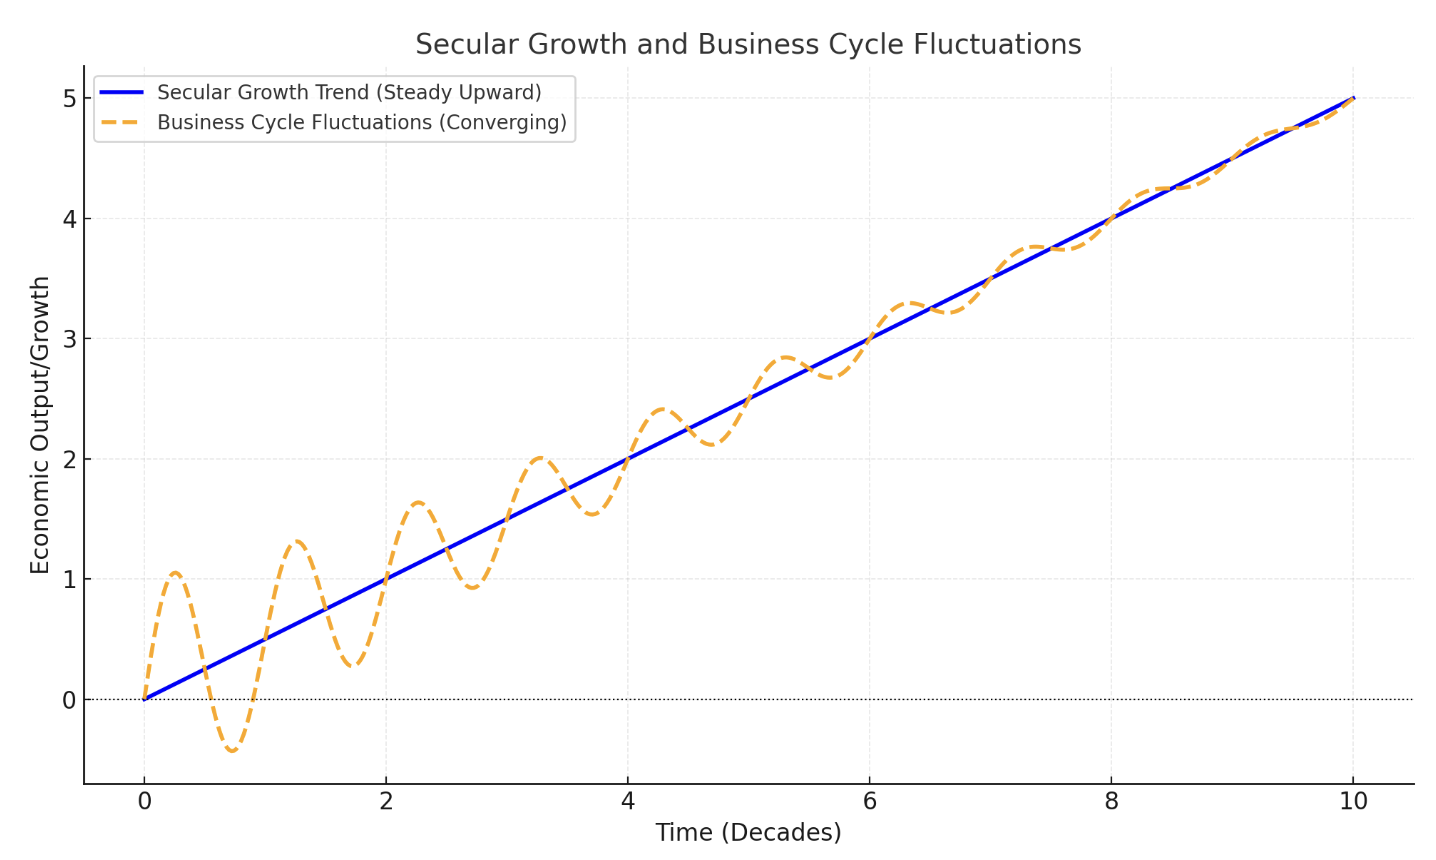
 
The consistent dampening of economic volatility is the primary reason asset prices have the confidence to rise to the levels we see today. Artificially low interest rates, years of quantitative easing followed by “fake” quantitative tightening, ample liquidity reserves for failing banks such as SVB (perhaps we will deal with moral hazard later), activist Treasury issuance, deficit spending, reverse repo lending facilities, and other similar measures are all factors in the function that has effectively killed volatility. These stimuli, as artificial as they are, lie at the core of America’s outperformance. Record-high margins and American productivity outperformances—which may or may not be justified at the multiples we see today—owe much to the death of volatility since the Global Financial Crisis.

The focus of this piece is on the mechanisms, tools, and financial engineering that U.S. authorities have deployed primarily since the Global Financial Crisis, and may utilize in the future, to continue to artificially smooth the business cycle. When authorities reveal they are about to use one of their tools, markets move, generally setting a new positive trend; hence, monitoring the authority’s most powerful weapons is crucial.

I also argue that volatility will only return when these tools are slowly rolled off. There will be windows of time when there is no easing or balancing taking place, and those will be periods of potential vulnerability.





## Rule Number One: Lots of Liquidity 

In [ ]:
If we want to look at all the flows that could go into asset prices we need to start with 

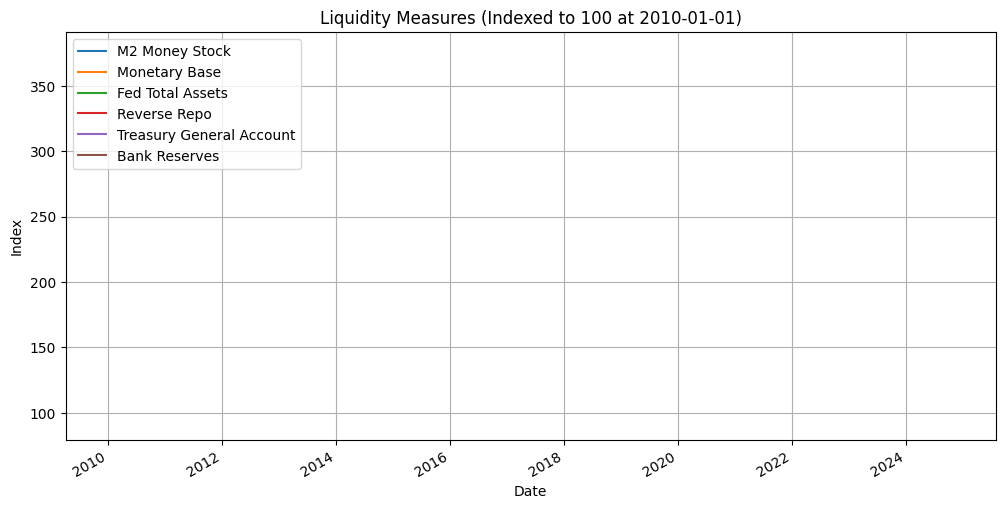

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# 1. Set up your FRED API key
fred = Fred(api_key='b1b93f854d911b3cdc94df6dd9ec0365')

# 2. Define the FRED Series IDs and readable names
series_ids = {
    'M2SL':       'M2 Money Stock',
    'AMBSL':      'Monetary Base',
    'WALCL':      'Fed Total Assets',
    'RRPONTSYD':  'Reverse Repo',
    'WTREGEN':    'Treasury General Account',
    'TOTRESNS':   'Bank Reserves'
}

# 3. Download each series as a Pandas Series
data_frames = []
for fred_id, series_name in series_ids.items():
    ts = fred.get_series(fred_id)
    ts.name = series_name
    data_frames.append(ts)

# 4. Combine all series into a single DataFrame
df = pd.concat(data_frames, axis=1)

# 5. (Optional) Restrict the date range to something recent
start_date = '2010-01-01'
df = df.loc[start_date:]

# 6. Index each series to 100 at the start date
df_indexed = (df / df.iloc[0]) * 100

# 7. Plot the indexed DataFrame
plt.figure(figsize=(12, 6))
df_indexed.plot(ax=plt.gca())
plt.title("Liquidity Measures (Indexed to 100 at " + start_date + ")")
plt.ylabel("Index")
plt.xlabel("Date")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### Reserves of Depository Institutions: Total (TOTRESNS)

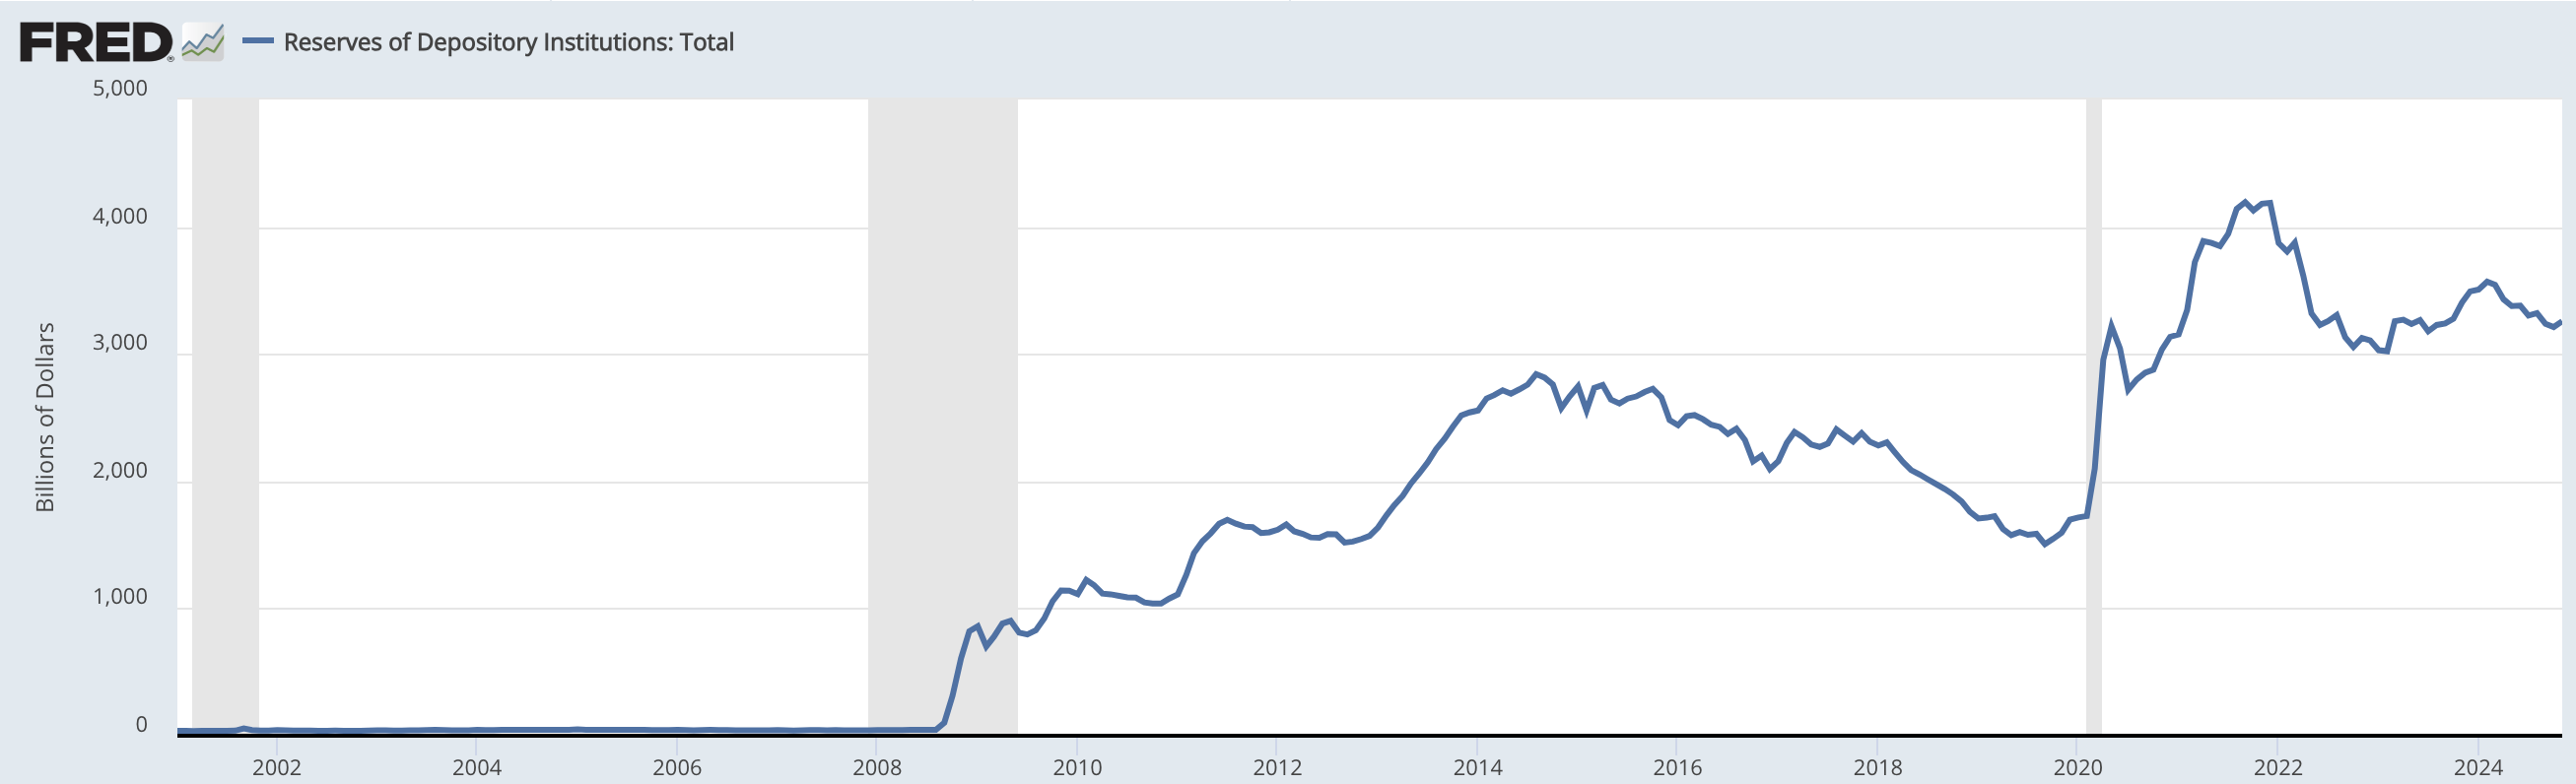

[link](https://fred.stlouisfed.org/seriesBeta/TOTRESNS)

The **total central bank reserves held by depository institutions at the Federal Reserve** include both [required reserves](https://fred.stlouisfed.org/seriesBeta/REQRESNS) (which have been cut to zero since March 2020) and [excess reserves](https://fred.stlouisfed.org/seriesBeta/EXCSRESNS) ... which are now all reserves! This does not include the TGA, which is a non-reserve account at the Fed. 

Central Bank reserves are just money for the interbank ecosystem system so banks can meet settlements and liquidity needs in that ecosystem. They are not dispersed into the "real economy", per se. But they are a key liquidity monitor for the banking system. 



Setting rates in the IORB and the RRP is how the Fed sets a floor on short term rates because they offer a rate for lenders with excess liquidity to earn the Fed's target rate on their funds, rather than forcing them to participate in markets that may not offer as competitive a return, thereby driving the rates offered for liquidity in those markets up to the Fed's target rate. This process absorbs excess liquidity in the banking ecosystem. 

For example, if Goldman Sachs has excess liquidity, to earn a return on that liquidity they will look to private repo markets, where rates are tied to the Secured Overnight Financing Rate (SOFR). If SOFR falls below the IORB rate, Goldman Sachs can deposit its money at the Fed to earn the IORB instead of lending in the repo market. This reduces liquidity in the repo market, pushing SOFR back up toward the IORB rate.

If a money market fund like Fidelity Government Money Market Fund, needs to park cash overnight while ensuring they can meet settlement obligations for withdrawing investors, they can lend in the Fed Funds Market or private repo markets. However, if the rates they earn there are too low, they can led to the Fed via the RRP. The RRP offers a risk-free, collateralized option at the RRP rate, ensuring a competitive return and thereby reducing liquidity in other markets below the RRP rate, which can push those rates higher.

How can we observe liquidity in the interbank lending system?


- We can see volumes in the RRP [here](https://fred.stlouisfed.org/graph/?g=EPMW) 
- We can see volumes on private repo markets via SOFR rates and volumes [here](https://www.newyorkfed.org/markets/reference-rates/sofr)
- We can see volumes in Fed Funds markets via Effective Fed Funds Rates (EFFR) and volumes [here](https://www.newyorkfed.org/markets/reference-rates/effr)

Why do we observe liquidity in the interbank lending system?

In May 2023, the RRP drained as participants sought better returns outside the facility, primarily in T-bills after a surge in issuance. As the RRP drains, these funds are redeployed into higher-yielding alternatives. In this case they flowed into T-bills, but as T-bills yields' decline as the funds from the RRP absorbe supply, investors move further out the risk curve to corporate bonds, high-yield debt, and equities, tightening credit spreads and supporting higher stock valuations.

In this case, the Treasury and Fed basically got together and recognized the RRP was a source of liquidity to refil the TGA, so they issued bills the RRP constituents would buy so as not to drag the rest of the liquidity complex as the refilled the TGA. 

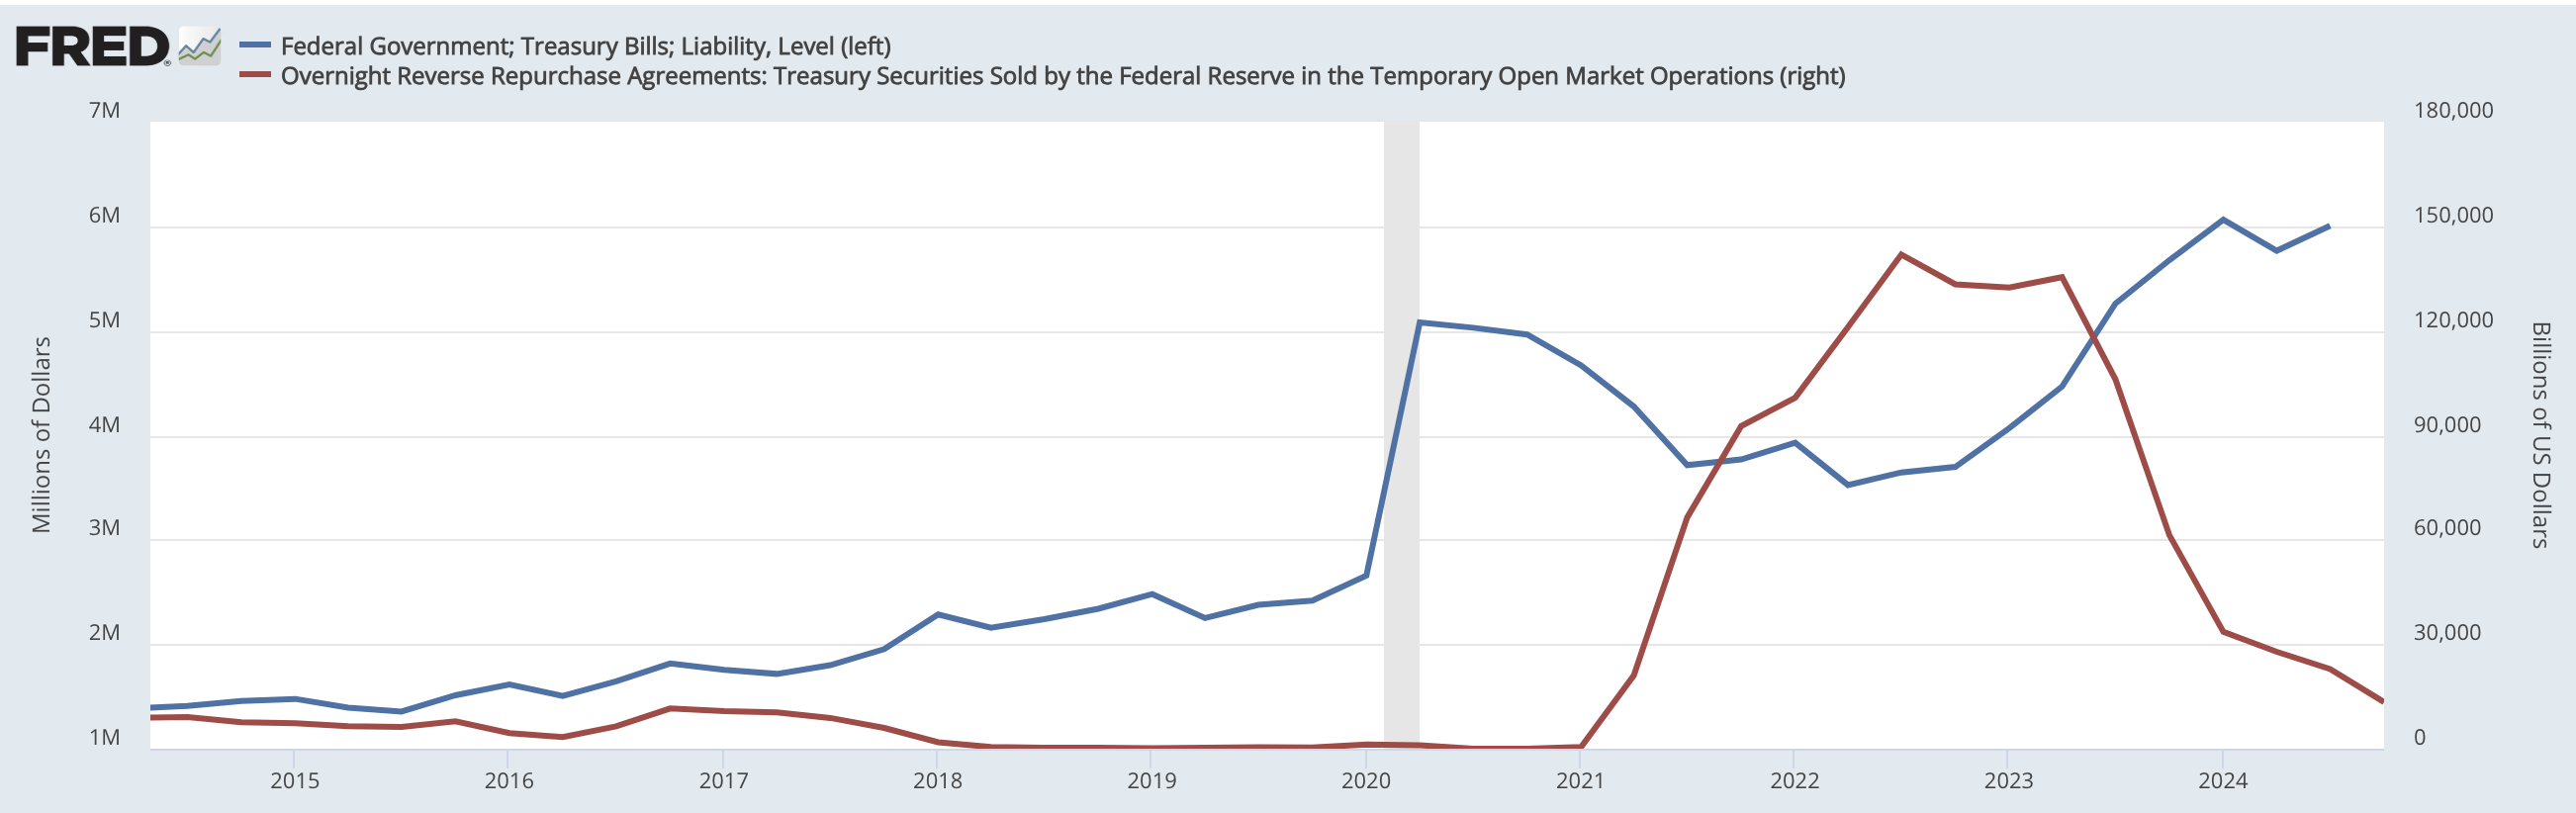

Thus a highly filled RRP indicates there is liquidity waiting to be moved into the risk curve, while an empty RRP means if anyone is looking for a liquidity source for T-bills in the future, they will have to look else where. 

One should also monitor the spreads between rates offered by different markets such as RRP, SOFR, and T-bills. Below we can see that during the same period of the RRP drain, the spread between the RRP rate minus T-bills trend higher, increasing T-bills demand from RRP participants. 


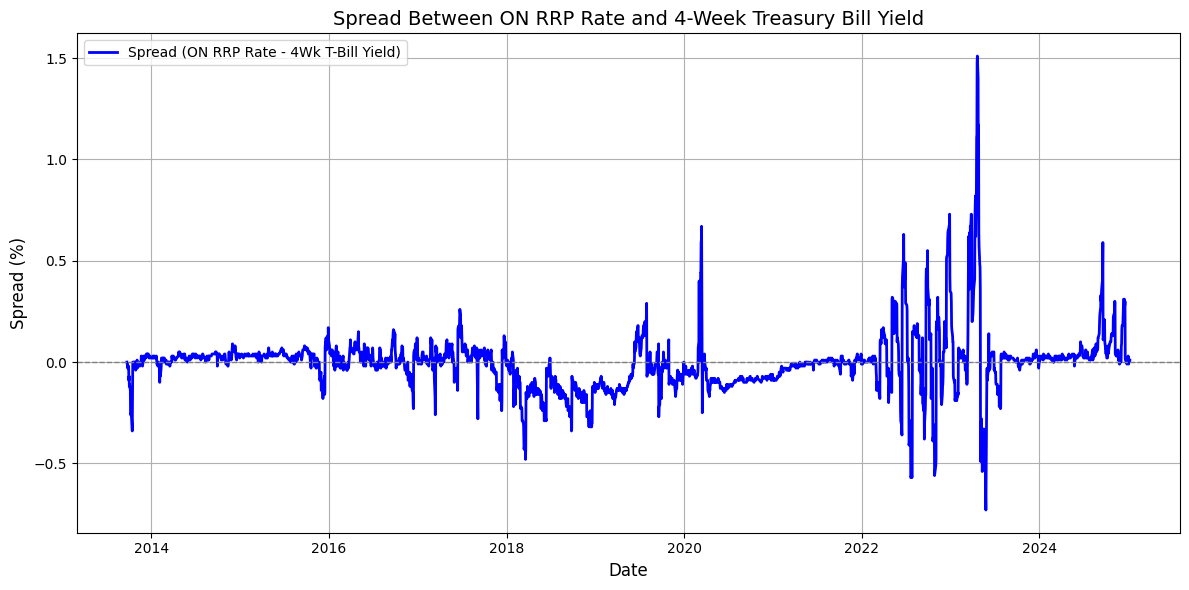

In [3]:

from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

fred_api_key = 'b1b93f854d911b3cdc94df6dd9ec0365'
fred = Fred(api_key=fred_api_key)

# Fetch ON RRP Rate (RRPONTSYD) and 4-week Treasury Bill Yield (DTB4WK)
try:
    on_rrp = fred.get_series('RRPONTSYAWARD')
    t_bill_4wk = fred.get_series('DTB4WK')
except Exception as e:
    print(f"Error fetching data from FRED: {e}")
    raise

# Align data by date and calculate the spread
data = pd.concat([on_rrp, t_bill_4wk], axis=1)
data.columns = ['ON_RRP_Rate', '4Wk_TBill_Yield']
data['Spread'] = data['ON_RRP_Rate'] - data['4Wk_TBill_Yield']

# Drop rows with missing values
data.dropna(inplace=True)

# Plot the spread
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Spread'], label='Spread (ON RRP Rate - 4Wk T-Bill Yield)', color='blue', linewidth=2)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Spread Between ON RRP Rate and 4-Week Treasury Bill Yield', fontsize=14)
plt.ylabel('Spread (%)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

Why didnt commercial banks' central bank reserves decline to chase treasuries like the money market funds that left the RRP? Money market funds need short term loans to meet the fluidity of there cash ne

So far we have discussed facilities to absorb excess liquidty. When combinig their directional momentum you can get a sense for how liquidity is develpoing in the entire market. 

However what is truly key to watch (reword) is when Monetary powers injects liquidity.

standing repo facility 
outright quantitaitive easing 
ending QT and reinvesting MBS proceeds back into treasuries 
discount window lending(svb)
unique:
TGA spenddown - so long as it is not being financed by new bond issuance, is a liquidity injections (see repoinsights twitter threadn and andys 101 notes) 

ATI - historically the proportion of bills out of total issuance is only above 20% in financial crisis. And especially during times of an inverted yeild curve. Considering the curve was inverted in 2023 when yellen skewed treasury issuance (should could finance cheaper on the long end). bill issuance is usually only higher during crisis or when the curve is very steep. 

Global central banks
boj 
pboc


bond volatitlity (the move index) also influences credit globally because bonds are used as collateral (repo markets) and as that colaterall pile grows, so can credit. Reducing the move index is a singificant increase to golbal liquidity. 

Why balance sheet roll off is fake Quantitaitive tightening. 

-- ok actually scratch the below, what happens is the Treasury decides how to pay back these bonds because the bonds are repaid by rolling over debt as they matury and new debt is issued. So really as bonds mature of the feds balance sheet, the TGA is spent down to pay them (is it though if the bonds are on the feds balance sheet? because the fed will just send that money back to the treasury?) and then the treausry d

As the fed allows Treasuries to roll of its account at, well the Fed, TGA pays the interest and the balance on the bonds upon maturity, but the Fed gives that money right back to the treasury via the TGA. So while there is a reduction of Central Bank reserves because the Fed has reduced its own balance sheet, there is no reduction on commercial banks' central bank reserves and thus no impact on interbank liquidity. 

On the other hand if the fed was selling assets it would be exchanging assets for commercial banks' reserves and thus extracting interbank liquidity in addition to crowding out investment (increasing Treasury supply for example).  

One could argue the TGA has to draw central bank reserves from commercial banks in order to pay off maturing treasuries, but the TGA would have to do this irrespective of who was rolling off the treasuries from their balance sheet.

The Federal deficit itself is not necessarily a drag on liquidity because every dollar spent by the government is injected into the private sector savings which is used to buy the bonds to fund the deficit? so is a deficit stimulative or neutral? only stimulative if the exonomy is able to take the spending an be productive with it in a manner that is greater than its cost? 
